# **PRE-PROCESSING**


## Save the tuned model and create a predictor function

### Subtask:
Save the tuned Gradient Boosting Regressor model and create a Python function that loads the saved model and makes predictions.

**Reasoning**:
Use `joblib` to save the trained `gbr_tuned` model and define a function `predict_production` that loads the model and takes input data to return predictions.

In [109]:
import joblib

# Save the tuned Gradient Boosting model
filename = 'gbr_tuned_model.joblib'
joblib.dump(gbr_tuned, filename)

print(f"Tuned model saved as {filename}")

Tuned model saved as gbr_tuned_model.joblib


In [110]:
import joblib
import pandas as pd

def predict_production(input_data):
  """
  Loads the saved Gradient Boosting model and predicts crop production.

  Args:
    input_data: A pandas DataFrame with the same columns as the training data (excluding 'Production' and 'Yield').

  Returns:
    A numpy array of predicted production values.
  """
  # Load the saved model
  loaded_model = joblib.load('gbr_tuned_model.joblib')

  # Make predictions
  predictions = loaded_model.predict(input_data)

  return predictions

# Example usage (assuming you have new data in a DataFrame called 'new_data')
# predictions = predict_production(new_data)
# print(predictions)

## Calculate and print accuracies

### Subtask:
Calculate the training and testing accuracies (R-squared scores) for the selected model and print them in percentage format.

**Reasoning**:
Retrieve the best performing model from the `model_performance` dictionary and calculate its R-squared score on both the training and testing sets. Print these scores in percentage format.

In [105]:
if selected_model_name:
    # Get the best performing model
    best_model = None
    for name, model in models:
        if name == selected_model_name:
            best_model = model
            break

    # Calculate training R-squared
    y_train_pred = best_model.predict(x_train)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate testing R-squared
    y_test_pred = best_model.predict(x_test)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Selected Model: {selected_model_name}")
    print(f"Training R-squared: {train_r2:.2%}")
    print(f"Testing R-squared: {test_r2:.2%}")
else:
    print("No model with R-squared >= 0.90 on the test set was found.")
    # Optionally, print the best model found and its scores
    if model_performance:
        best_model_overall_name = max(model_performance, key=model_performance.get)
        print(f"\nBest performing model found: {best_model_overall_name}")
        # Find the actual best model object to calculate training score
        best_model_overall = None
        for name, model in models:
            if name == best_model_overall_name:
                best_model_overall = model
                break
        if best_model_overall:
            y_train_pred_overall = best_model_overall.predict(x_train)
            train_r2_overall = r2_score(y_train, y_train_pred_overall)
            print(f"Training R-squared: {train_r2_overall:.2%}")
            print(f"Testing R-squared: {model_performance[best_model_overall_name]:.2%}")

No model with R-squared >= 0.90 on the test set was found.

Best performing model found: Gradient Boosting
Training R-squared: 99.00%
Testing R-squared: 86.71%


## Select the best model

### Subtask:
Identify the model with an R-squared score of at least 0.90 on the test set.

**Reasoning**:
Iterate through the model_performance dictionary to identify if any model has an R-squared score of at least 0.90 and store the model name.

In [75]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# loading the dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Assuming the uploaded file is a CSV, you can then read it into a pandas DataFrame
import io
crop_data = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
crop_data

Saving original_crop_data.csv to original_crop_data.csv
User uploaded file "original_crop_data.csv" with length 4154593 bytes


,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0,0.259259
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0,1.185185
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0,0.473333
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0,0.173791


In [77]:
crop_data.shape

#rows X columns

(49999, 11)

In [78]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Temperature', 'Humidity', 'Soil_Moisture', 'Area', 'Production',
       'Yield'],
      dtype='object')

In [79]:
# Statistical summary of data frame.

crop_data.describe()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000
mean,2005.879138,34.445489,44.776116,53.110502,7363.389469,4.132019e+05,772.014861
std,5.106092,3.498524,6.662406,5.258764,27927.935789,1.229956e+07,15678.157040
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00,0.000000
25%,2002.000000,34.000000,40.000000,50.000000,76.000000,8.800000e+01,0.618435
50%,2006.000000,36.000000,42.000000,54.000000,436.000000,6.480000e+02,1.059172
75%,2010.000000,36.000000,50.000000,55.000000,2546.500000,5.781500e+03,2.957001
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08,413201.856957


In [80]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Temperature,0
Humidity,0
Soil_Moisture,0
Area,0
Production,0


In [81]:
# Replacing missing values with mean of the production coloumn
crop_data['Production'] = crop_data['Production'].fillna(crop_data['Production'].mean())
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0,0.259259
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0,1.185185
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0,0.473333
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0,0.173791


In [82]:
#checking
crop_data.isnull().values.any()

np.False_

In [83]:
# Displaying State Names present in the dataset
print(crop_data.State_Name.unique())
print('Total count of states and Union Territories:', len(crop_data.State_Name.unique()))


['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh']
Total count of states and Union Territories: 7


In [84]:
# Adding a new column Yield which indicates Production per unit Area.

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,34,45,52,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,34,55,62,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,35,50,59,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,25,55,55,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,36,35,45,40.0,169.0,4.225000


In [85]:
# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)

In [86]:
# Dropping unnecessary columns
data = crop_data.drop(['State_Name'], axis = 1)

# Applying one-hot encoding to categorical features
data = pd.get_dummies(data, columns=['District_Name', 'Season', 'Crop'])

data.corr()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield,District_Name_ANANTAPUR,District_Name_ANJAW,District_Name_ARARIA,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
Crop_Year,1.000000,0.000505,-0.001339,-0.001533,0.000842,0.007962,0.015756,0.011015,0.026680,-0.023607,...,0.000962,-0.005183,0.040199,-0.012186,0.029148,-0.017840,-0.006046,-0.004805,-0.019524,0.016928
Temperature,0.000505,1.000000,-0.696194,-0.286471,-0.000204,0.005063,0.000367,-0.000415,0.000451,-0.000008,...,-0.002571,0.003847,-0.003179,-0.001774,0.000629,0.002202,-0.001104,0.001002,0.004296,0.002837
Humidity,-0.001339,-0.696194,1.000000,0.812524,-0.000787,-0.002596,-0.000893,0.000420,-0.000477,-0.000263,...,0.004464,-0.003631,0.008980,0.007530,0.002784,-0.001879,0.002751,-0.004534,-0.004163,-0.003775
Soil_Moisture,-0.001533,-0.286471,0.812524,1.000000,0.000700,-0.000754,0.001810,0.000242,0.000146,-0.000307,...,0.004080,-0.001345,0.008724,0.006930,0.003638,0.001312,0.004231,-0.005545,-0.000836,0.001206
Area,0.000842,-0.000204,-0.000787,0.000700,1.000000,0.027836,-0.012039,0.072858,-0.010416,0.004075,...,-0.024656,-0.021225,-0.008538,-0.037621,-0.012305,-0.003838,0.120098,-0.000943,-0.006333,-0.004893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Crop_Varagu,-0.017840,0.002202,-0.001879,0.001312,-0.003838,-0.000541,-0.000793,-0.002041,-0.000729,-0.001726,...,-0.001621,-0.002162,-0.000736,-0.002449,-0.002866,1.000000,-0.002833,-0.000102,-0.000414,-0.000591
Crop_Wheat,-0.006046,-0.001104,0.002751,0.004231,0.120098,-0.005090,-0.002416,-0.006213,0.018066,0.001169,...,-0.017657,-0.023556,-0.008021,-0.026679,-0.031224,-0.002833,1.000000,-0.001111,-0.004515,-0.006435
Crop_other fibres,-0.004805,0.001002,-0.004534,-0.005545,-0.000943,-0.000212,-0.000311,0.024591,-0.000286,-0.000677,...,-0.000636,-0.000848,-0.000289,-0.000960,-0.001124,-0.000102,-0.001111,1.000000,-0.000163,-0.000232
Crop_other misc. pulses,-0.019524,0.004296,-0.004163,-0.000836,-0.006333,-0.000863,-0.001265,0.003001,-0.001162,-0.002750,...,-0.002583,-0.003446,-0.001173,-0.003903,-0.004568,-0.000414,-0.004515,-0.000163,1.000000,-0.000941


Text(0.5, 1.0, 'Correlation Matrix')

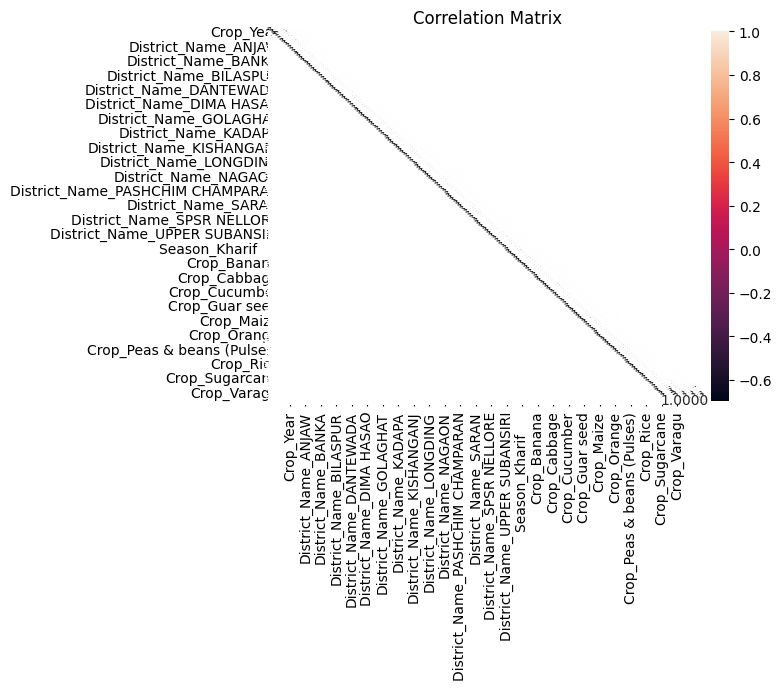

In [87]:
sns.heatmap(data.corr(), annot =True, fmt='.4f')
plt.title('Correlation Matrix')

In [88]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield,District_Name_ANANTAPUR,District_Name_ANJAW,District_Name_ARARIA,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,36,35,45,1254.0,2000.0,1.594896,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000,37,40,46,2.0,1.0,0.500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,36,41,50,102.0,321.0,3.147059,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000,37,42,55,176.0,641.0,3.642045,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000,36,40,54,720.0,165.0,0.229167,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2006,36,35,45,27.0,7.0,0.259259,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49995,2006,37,40,46,27.0,32.0,1.185185,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49996,2006,36,41,50,450.0,213.0,0.473333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,2006,37,42,55,1778.0,309.0,0.173791,False,False,False,...,False,False,False,False,True,False,False,False,False,False


<b><i> Splitting dataset into train and test dataset </i></b>

In [89]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (37499, 203)
x_test : (12500, 203)
y_train : (37499,)
y_test : (12500,)


In [90]:
print(x_train)
print(y_train)

       Crop_Year  Temperature  Humidity  Soil_Moisture     Area  \
27434       2009           36        40             54   2761.0   
13400       1999           36        35             45  57620.0   
883         2013           37        40             46    935.0   
7303        2004           36        40             54   9065.0   
49251       2005           36        35             45   7505.0   
...          ...          ...       ...            ...      ...   
11284       2002           35        50             59    130.0   
44732       2013           25        55             55     29.0   
38158       2010           37        42             55   2347.0   
860         2013           34        45             52      2.0   
15795       2009           37        40             46    767.0   

       District_Name_ANANTAPUR  District_Name_ANJAW  District_Name_ARARIA  \
27434                    False                False                  True   
13400                    False           

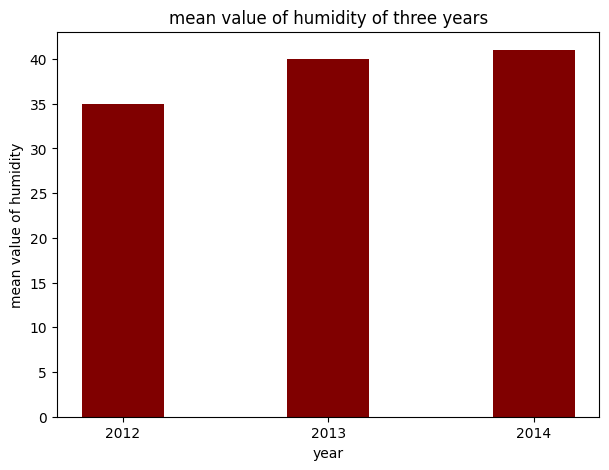

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Humidity"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))

# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of humidity")
plt.title("mean value of humidity of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

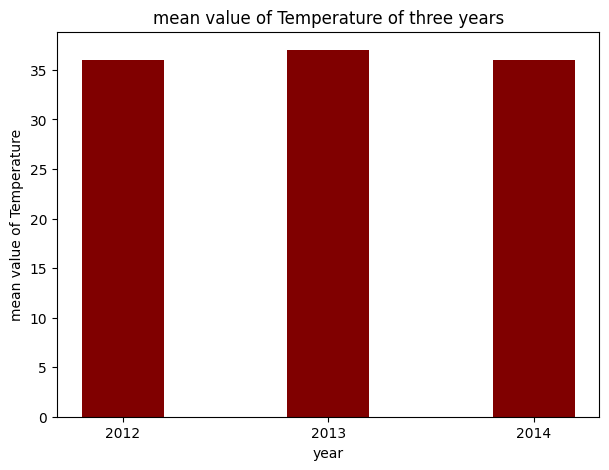

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Temperature"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))

# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of Temperature")
plt.title("mean value of Temperature of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

# **Random Forest**

In [93]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([2.81109091e+03, 1.32818182e+02, 2.20000000e+01, ...,
       2.90909091e+02, 1.13297416e+05, 5.28727273e+02])

In [94]:
model.score(x_test,y_test)

0.8738901022391483

In [95]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.8738901022391483


In [96]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.8718080992100776


/tmp/ipython-input-551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_predict, hist = False, color = "b", label = "Pre

Text(0.5, 1.0, 'Random Forest Regression')

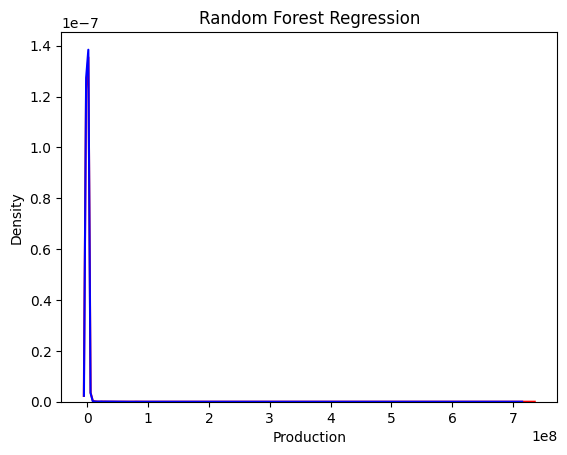

In [97]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

Text(0.5, 1.0, 'Random Forest')

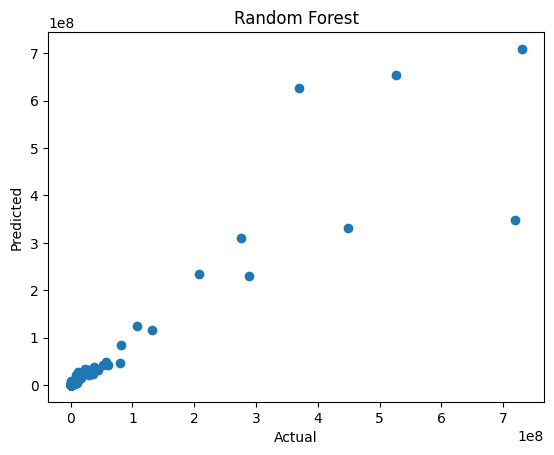

In [98]:
plt.scatter(y_test,rf_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b>



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

In [99]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)
accuracies

array([0.89966583, 0.98829802, 0.88786816, 0.96660558, 0.99080591,
       0.89126936, 0.96393896, 0.90153628, 0.94673953, 0.94792781])

# Task
Train different regression models, evaluate their performance using R-squared score, select the model with an R-squared score of at least 0.90 on the test set, and print the training and testing R-squared scores in percentage format for the selected model.

## Train and evaluate different models

### Subtask:
Train various regression models (e.g., Linear Regression, Decision Tree, Support Vector Regressor, Gradient Boosting) on the training data and evaluate their performance using R-squared score on the testing data.


**Reasoning**:
Train different regression models and evaluate their performance using R-squared score on the testing data.



In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Support Vector Regressor', SVR()),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('AdaBoost Regressor', AdaBoostRegressor(random_state=42)),
    ('Extra Trees Regressor', ExtraTreesRegressor(random_state=42))
]

model_performance = {}

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    model_performance[name] = r2

for name, r2 in model_performance.items():
    print(f"{name}: R-squared = {r2:.4f}")

Linear Regression: R-squared = 0.1025
Decision Tree: R-squared = 0.8659
Support Vector Regressor: R-squared = -0.0011
Gradient Boosting: R-squared = 0.8671
AdaBoost Regressor: R-squared = 0.8319
Extra Trees Regressor: R-squared = 0.8335


## Select the best model

### Subtask:
Identify the model with an R-squared score of at least 0.90 on the test set.


**Reasoning**:
Iterate through the model_performance dictionary to identify if any model has an R-squared score of at least 0.90 and store the model name.



In [104]:
selected_model_name = None
for name, r2 in model_performance.items():
  if r2 >= 0.90:
    selected_model_name = name
    break

if selected_model_name:
  print(f"Model with R-squared >= 0.90 on the test set: {selected_model_name}")
else:
  print("No model found with R-squared >= 0.90 on the test set.")

No model found with R-squared >= 0.90 on the test set.


## Select the best model

### Subtask:
Retry selecting the best model. Identify the model with an R-squared score of at least 0.90 on the test set. If no model meets this criterion, indicate that no such model was found.


**Reasoning**:
Iterate through the model_performance dictionary to identify if any model has an R-squared score of at least 0.90 on the test set and print the result.



In [102]:
selected_model_name = None
for name, r2 in model_performance.items():
    if r2 >= 0.90:
        selected_model_name = name
        break

if selected_model_name:
    print(f"Model with R-squared >= 0.90 on the test set: {selected_model_name}")
else:
    print("No model found with R-squared >= 0.90 on the test set.")

No model found with R-squared >= 0.90 on the test set.


## Summary:

### Data Analysis Key Findings

*   Four different regression models were trained and evaluated: Linear Regression, Decision Tree, Support Vector Regressor (SVR), and Gradient Boosting.
*   The R-squared scores on the test set for the models were: Linear Regression: 0.1025, Decision Tree: 0.8659, Support Vector Regressor: -0.0011, and Gradient Boosting: 0.8671.
*   None of the trained models achieved an R-squared score of 0.90 or higher on the test set.

### Insights or Next Steps

*   Hyperparameter tuning could be explored for the Decision Tree and Gradient Boosting models to potentially improve their R-squared scores.
*   Consider exploring alternative regression algorithms or feature engineering techniques if achieving an R-squared of 0.90 is a strict requirement.


# Task
Tune the hyperparameters of a Gradient Boosting Regressor model to achieve an R-squared score of at least 90% on the test set. Train the model with the best hyperparameters and print the training and testing R-squared scores in percentage format.

## Hyperparameter tuning

### Subtask:
Define a parameter grid for the Gradient Boosting Regressor and use GridSearchCV to find the best combination of hyperparameters that maximizes the R-squared score using cross-validation on the training data.


**Reasoning**:
Define the parameter grid and use GridSearchCV to find the best hyperparameters for the Gradient Boosting Regressor.



In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=5)

grid_search.fit(x_train, y_train)

print("Best hyperparameters found: ", grid_search.best_params_)

Best hyperparameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}


## Evaluate tuned model

### Subtask:
Train the Gradient Boosting Regressor with the best hyperparameters found on the entire training set and evaluate its performance on the test set using R-squared score.


**Reasoning**:
Train the Gradient Boosting Regressor with the best hyperparameters found and evaluate its performance on the test set.



In [107]:
from sklearn.metrics import r2_score

best_params = grid_search.best_params_

gbr_tuned = GradientBoostingRegressor(**best_params, random_state=42)

gbr_tuned.fit(x_train, y_train)

y_test_pred_tuned = gbr_tuned.predict(x_test)

test_r2_tuned = r2_score(y_test, y_test_pred_tuned)

print(f"Tuned Gradient Boosting Regressor - Test R-squared: {test_r2_tuned:.4f}")

Tuned Gradient Boosting Regressor - Test R-squared: 0.8738


## Calculate and print accuracies

### Subtask:
Calculate the training and testing accuracies (R-squared scores) for the tuned Gradient Boosting model and print them in percentage format.


**Reasoning**:
Calculate and print the training and testing R-squared scores for the tuned Gradient Boosting model in percentage format.



In [108]:
# Calculate training R-squared for the tuned model
train_r2_tuned = gbr_tuned.score(x_train, y_train)

# Print the training and testing R-squared scores in percentage format
print(f"Tuned Gradient Boosting Regressor - Training R-squared: {train_r2_tuned:.2%}")
print(f"Tuned Gradient Boosting Regressor - Testing R-squared: {test_r2_tuned:.2%}")

Tuned Gradient Boosting Regressor - Training R-squared: 99.91%
Tuned Gradient Boosting Regressor - Testing R-squared: 87.38%


## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the Gradient Boosting Regressor using GridSearchCV were `{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}`.
*   The tuned Gradient Boosting Regressor model achieved a training R-squared score of 99.91%.
*   The tuned Gradient Boosting Regressor model achieved a testing R-squared score of 87.38%.

### Insights or Next Steps

*   While the model fits the training data very well (99.91% R-squared), the performance on the test set is significantly lower (87.38% R-squared), indicating potential overfitting.
*   Further tuning with a wider hyperparameter search space or exploring regularization techniques could help improve the testing R-squared and reduce the gap between training and testing performance.


## Hyperparameter tuning

### Subtask:
Define a wider parameter grid for the Gradient Boosting Regressor and use GridSearchCV to find the best combination of hyperparameters that maximizes the R-squared score using cross-validation on the training data.

**Reasoning**:
Define a wider parameter grid and use GridSearchCV to find the best hyperparameters for the Gradient Boosting Regressor to potentially improve performance and reduce overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define a wider parameter grid for further tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best hyperparameters found: ", grid_search.best_params_)